# Initialization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

In [3]:
sns.set_context('talk')

# Read data

In [4]:
train = pd.read_csv(join('data', 'train.csv'),
                    usecols=['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent'],
                    dtype={'Species': 'category', 'Trap': 'category'},
                    parse_dates=['Date'])

# Combine data by date, trap, and species

In [5]:
train_comb = pd.DataFrame(columns=train.columns)

temp_row = train.iloc[0].copy()

for row in range(1, train.shape[0]):
    if (temp_row.Date != train.iloc[row].Date or
            temp_row.Trap != train.iloc[row].Trap or
            temp_row.Species != train.iloc[row].Species):
        train_comb = train_comb.append(temp_row, ignore_index=True)
        temp_row = train.iloc[row].copy()

    else:
        temp_row['NumMosquitos'] += train.iloc[row].NumMosquitos
        temp_row['WnvPresent'] = max(temp_row.WnvPresent,
                                     train.iloc[row].WnvPresent)

# Processing

In [6]:
# Calculate total mosquitos caught by trap in dataset
# and percentage of days with wnv present
train_by_trap = train_comb.groupby('Trap')

tot_mos = train_by_trap.NumMosquitos.sum()
per_days_Wnv = train_by_trap.WnvPresent.sum()/train_by_trap.WnvPresent.count()

In [7]:
# Find location of each unique trap
trap_loc = {}

for trap in train.Trap.cat.categories:
    trap_loc[trap] = train[train.Trap == trap].iloc[0][['Longitude', 'Latitude']]

# Plot trap location, 

In [8]:
# Load map data
mapdata = np.loadtxt(join('data', 'mapdata_copyright_openstreetmap_contributors.txt'))

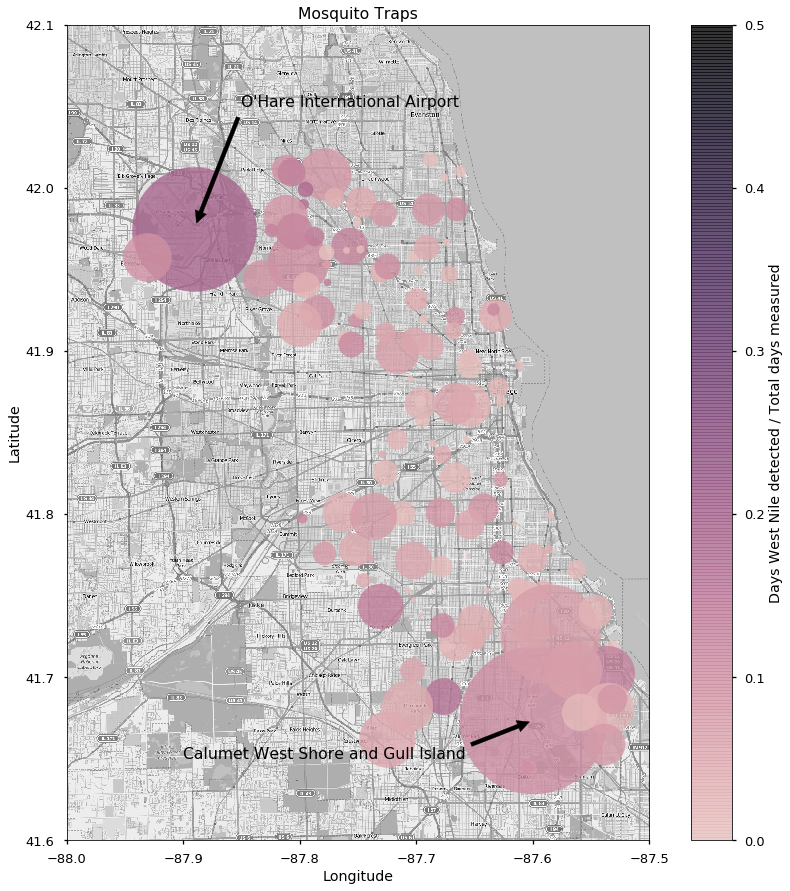

In [13]:
# Plot traps on map, size=number of mosquitos caught, color=percent days with wnv
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[-88, -87.5, 41.6, 42.1], aspect='auto')
ax.set_aspect(1.4)

cmap = sns.cubehelix_palette(start=3, dark=0, light=.8, as_cmap=True)

for trap in train.Trap.cat.categories:
    cax = ax.scatter(*trap_loc[trap], s=tot_mos[trap], c=per_days_Wnv[trap], alpha=0.8, cmap=cmap, vmin=0, vmax=0.5)

cbar = fig.colorbar(cax)

ax.annotate("O'Hare International Airport", xy=(-87.890615, 41.974689), xytext=(-87.85, 42.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('Calumet West Shore and Gull Island', xy=(-87.599862, 41.673408), xytext=(-87.9, 41.65),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    
ax.set_xlim(-88, -87.5)
ax.set_ylim(41.6, 42.1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

cbar.set_label('Days West Nile detected / Total days measured')

ax.set_title('Mosquito Traps')

plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'TrapMosCountMap.png'), format='png')

# Plot trap zones

In [12]:
# Load zones indexed by trap, and convert to traps indexed by zone
trap_zones = pd.read_pickle('trap_zones').set_index('Trap')

trap_loc = pd.DataFrame(trap_loc).T

zones = np.sort(trap_zones.Zone.unique())

zone_traps = trap_zones.groupby('Zone').groups

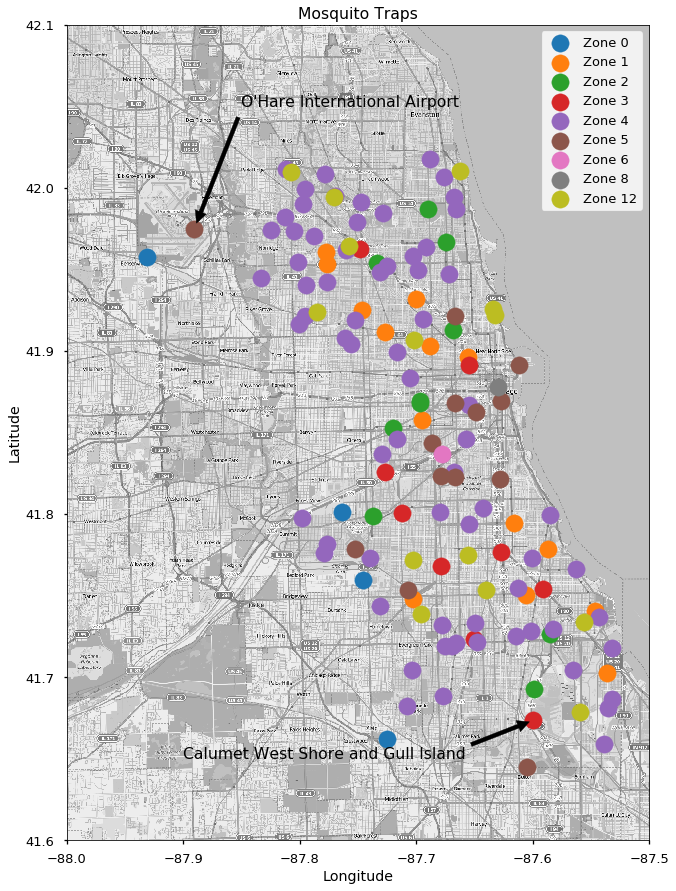

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(
    mapdata,
    cmap=plt.get_cmap('gray'),
    extent=[-88, -87.5, 41.6, 42.1],
    aspect='auto')
ax.set_aspect(1.4)

for zone in zones:
    ax.scatter(
        trap_loc[trap_loc.index.isin(zone_traps[zone])].Longitude.values,
        trap_loc[trap_loc.index.isin(zone_traps[zone])].Latitude.values,
        s=300,
        label=f'Zone {zone}')

ax.annotate(
    "O'Hare International Airport",
    xy=(-87.890615, 41.974689),
    xytext=(-87.85, 42.05),
    arrowprops=dict(facecolor='black', shrink=0.05), )

ax.annotate(
    'Calumet West Shore and Gull Island',
    xy=(-87.599862, 41.673408),
    xytext=(-87.9, 41.65),
    arrowprops=dict(facecolor='black', shrink=0.05), )

ax.legend()

ax.set_xlim(-88, -87.5)
ax.set_ylim(41.6, 42.1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_title('Mosquito Traps')

plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'TrapZone.png'), format='png')

# Plot weather stations

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


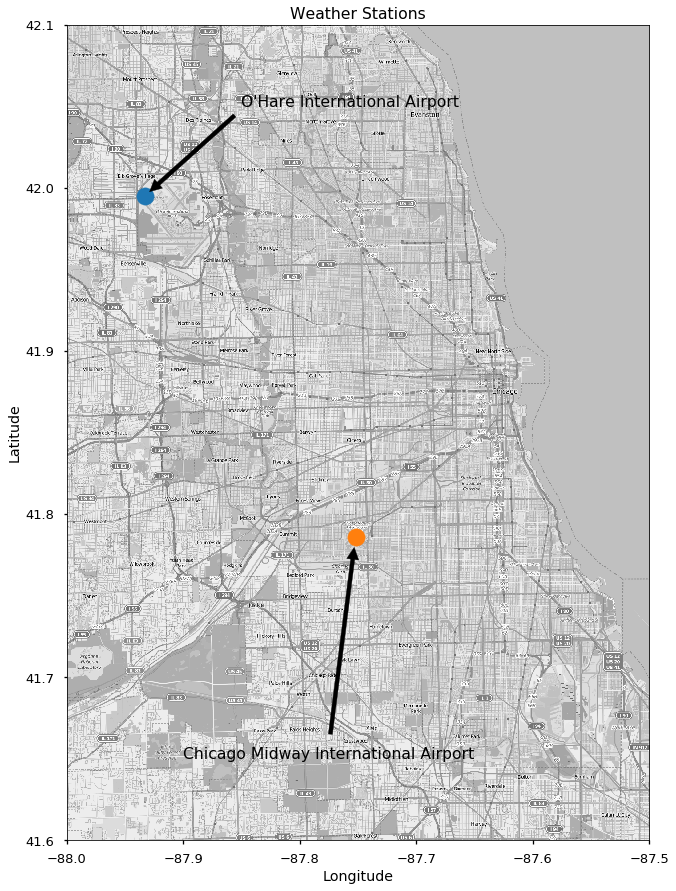

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(
    mapdata,
    cmap=plt.get_cmap('gray'),
    extent=[-88, -87.5, 41.6, 42.1],
    aspect='auto')
ax.set_aspect(1.4)

ax.scatter(
    -87.933,
    41.995,
    s=300)

ax.scatter(
    -87.752,
    41.786,
    s=300)

ax.annotate(
    "O'Hare International Airport",
    xy=(-87.933, 41.995),
    xytext=(-87.85, 42.05),
    arrowprops=dict(facecolor='black', shrink=0.05), )

ax.annotate(
    'Chicago Midway International Airport',
    xy=(-87.752, 41.786),
    xytext=(-87.9, 41.65),
    arrowprops=dict(facecolor='black', shrink=0.05), )

ax.legend()

ax.set_xlim(-88, -87.5)
ax.set_ylim(41.6, 42.1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_title('Weather Stations')

plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'Weather Stations.png'), format='png')